In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/block-data/Block_data.csv


In [2]:
data = pd.read_csv("/kaggle/input/block-data/Block_data.csv")
data.head()

,Date(UTC),UnixTimeStamp,Block_Time_Value,Net_Hash_Value,Difficulty_Value
0,7/30/2015,1438214400,4.46,11.5297,0.121
1,7/31/2015,1438300800,12.58,51.4594,0.603
2,08-01-2015,1438387200,16.34,57.7845,0.887
3,08-02-2015,1438473600,16.12,67.9224,1.020
4,08-03-2015,1438560000,16.37,74.5737,1.126


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date(UTC)         2515 non-null   object 
 1   UnixTimeStamp     2515 non-null   int64  
 2   Block_Time_Value  2515 non-null   float64
 3   Net_Hash_Value    2515 non-null   float64
 4   Difficulty_Value  2515 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 98.4+ KB


In [4]:
# convert column to datetime pandas
data['Date'] = pd.to_datetime(data['Date(UTC)'])
data.head()

,Date(UTC),UnixTimeStamp,Block_Time_Value,Net_Hash_Value,Difficulty_Value,Date
0,7/30/2015,1438214400,4.46,11.5297,0.121,2015-07-30
1,7/31/2015,1438300800,12.58,51.4594,0.603,2015-07-31
2,08-01-2015,1438387200,16.34,57.7845,0.887,2015-08-01
3,08-02-2015,1438473600,16.12,67.9224,1.020,2015-08-02
4,08-03-2015,1438560000,16.37,74.5737,1.126,2015-08-03


In [5]:
data['Difficulty_Value']= 1000*data['Difficulty_Value']

In [6]:
data = data[['Date','Block_Time_Value','Net_Hash_Value','Difficulty_Value']]
data.head()

,Date,Block_Time_Value,Net_Hash_Value,Difficulty_Value
0,2015-07-30,4.46,11.5297,121.0
1,2015-07-31,12.58,51.4594,603.0
2,2015-08-01,16.34,57.7845,887.0
3,2015-08-02,16.12,67.9224,1020.0
4,2015-08-03,16.37,74.5737,1126.0


In [7]:
data.corr()

,Block_Time_Value,Net_Hash_Value,Difficulty_Value
Block_Time_Value,1.000000,-0.313085,-0.259383
Net_Hash_Value,-0.313085,1.000000,0.997454
Difficulty_Value,-0.259383,0.997454,1.000000


<AxesSubplot:xlabel='Date', ylabel='Difficulty_Value'>

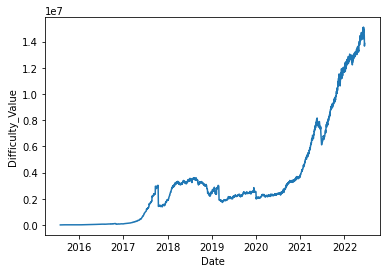

In [8]:
import seaborn as sns

sns.lineplot(data = data, x="Date", y="Difficulty_Value")

<AxesSubplot:xlabel='Date', ylabel='Net_Hash_Value'>

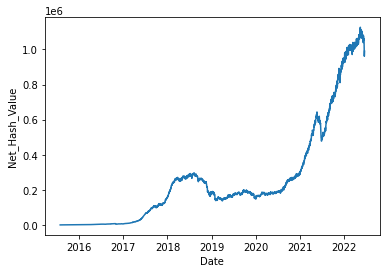

In [9]:
sns.lineplot(data = data, x="Date", y="Net_Hash_Value")

<AxesSubplot:xlabel='Date', ylabel='Block_Time_Value'>

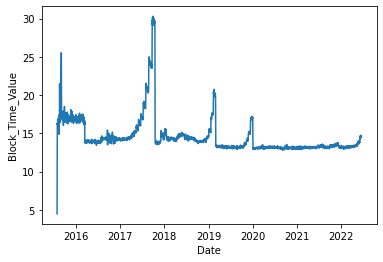

In [10]:
sns.lineplot(data = data, x="Date", y="Block_Time_Value")

# Observations and Ideas
Difficulty = Hash Rate/ Total number of miners 
https://medium.com/simplemining/what-affects-the-mining-profitability-for-ethereum-540fa9ef2bc5



In [11]:
data["Change"] = data["Difficulty_Value"] - data["Difficulty_Value"].shift()
data.head()

,Date,Block_Time_Value,Net_Hash_Value,Difficulty_Value,Change
0,2015-07-30,4.46,11.5297,121.0,NaN
1,2015-07-31,12.58,51.4594,603.0,482.0
2,2015-08-01,16.34,57.7845,887.0,284.0
3,2015-08-02,16.12,67.9224,1020.0,133.0
4,2015-08-03,16.37,74.5737,1126.0,106.0


In [12]:
for i in range(2515):
    data["Ratio"]= ((data["Difficulty_Value"][i]))/data["Net_Hash_Value"][i]
data.head()

,Date,Block_Time_Value,Net_Hash_Value,Difficulty_Value,Change,Ratio
0,2015-07-30,4.46,11.5297,121.0,NaN,13.998704
1,2015-07-31,12.58,51.4594,603.0,482.0,13.998704
2,2015-08-01,16.34,57.7845,887.0,284.0,13.998704
3,2015-08-02,16.12,67.9224,1020.0,133.0,13.998704
4,2015-08-03,16.37,74.5737,1126.0,106.0,13.998704


In [13]:
data.corr()

,Block_Time_Value,Net_Hash_Value,Difficulty_Value,Change,Ratio
Block_Time_Value,1.000000,-0.313085,-0.259383,-0.005059,NaN
Net_Hash_Value,-0.313085,1.000000,0.997454,0.074306,NaN
Difficulty_Value,-0.259383,0.997454,1.000000,0.072898,NaN
Change,-0.005059,0.074306,0.072898,1.000000,NaN
Ratio,NaN,NaN,NaN,NaN,NaN


Ratio same because equal number of miners considered!!

In [14]:
data_b1 = data.iloc[620:809]
data_b1.tail()

,Date,Block_Time_Value,Net_Hash_Value,Difficulty_Value,Change,Ratio
804,2017-10-11,29.33,109279.7021,2997386.0,83901.0,13.998704
805,2017-10-12,29.46,105449.0222,2911728.0,-85658.0,13.998704
806,2017-10-13,29.60,110049.5848,3031012.0,119284.0,13.998704
807,2017-10-14,29.71,105135.7480,2917998.0,-113014.0,13.998704
808,2017-10-15,29.09,108556.0976,2962491.0,44493.0,13.998704


In [15]:
data_b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 620 to 808
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              189 non-null    datetime64[ns]
 1   Block_Time_Value  189 non-null    float64       
 2   Net_Hash_Value    189 non-null    float64       
 3   Difficulty_Value  189 non-null    float64       
 4   Change            189 non-null    float64       
 5   Ratio             189 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 9.0 KB


**Taking help from effort definition of Physics, Difficulty = hash rate/number of miners**

Difficulty and hashrate are closely related. If you divide network difficulty by network hashrate, you will get the average block find time of a cryptocurrency block. # from https://2miners.com/eth-network-difficulty

<AxesSubplot:xlabel='Date', ylabel='Ratio'>

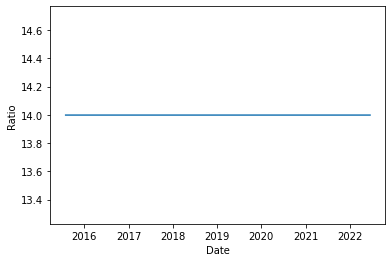

In [16]:
sns.lineplot(data = data, x="Date", y="Ratio")

Thus if we model the expected difficulty from the formula : \\

As we discussed in the previous section, following is the change (bold) introduced to ethereum difficulty algorithm to support the difficulty bomb:

current_block_difficulty = parent_block_difficulty + (parent_block_difficulty // 2048) *1 + int(2**((current_block_number // 100000) — 2))

from https://medium.facilelogin.com/the-mystery-behind-block-time-63351e35603a

We try to model the Hash rate using loose curve fitting onto the function : $10^8 \cdot e^{(\frac{x}{2}-4)}$

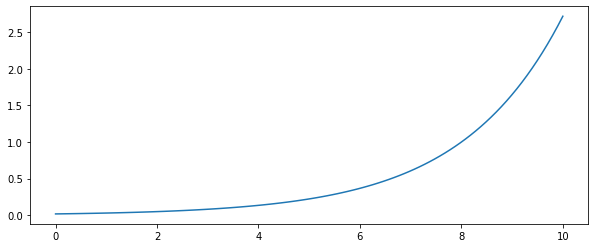

In [17]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating vectors X and Y
x = np.linspace(0, 10, 100)
y = np.exp(((x)/2)-4)
 
fig = plt.figure(figsize = (10, 4))
# Create the plot
plt.plot(x,y)
 
# Show the plot
plt.show()

Using gradient fitting

<AxesSubplot:xlabel='Date', ylabel='Net_Hash_Value'>

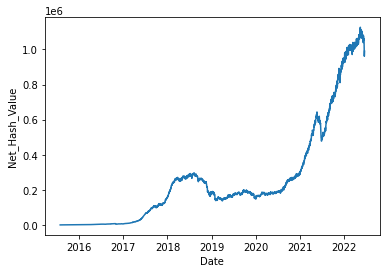

In [18]:
sns.lineplot(data = data, x="Date", y="Net_Hash_Value")

# Testing and Modelling

Block Number In EIP = 15530314 

Assumed Initial Block Time = 13.3s

Assumed Initial Hash Rate = $10^8 \cdot e^{(\frac{1.5530314}{2}-4)}$ = 3981608.51038 GH/s

Thus Assumed Difficulty = Assumed Initial Hash Rate*13.3 = 52955393.1881 GH

****Now The Bomb Goes off at Block = 15530314 ****

In [19]:
# using difficulty definition from yellowpaper
new_difficulty = 52955.3931881 + (52955.3931881 // 2048) *1 + int(2**((15530314 // 100000)-2))
print(new_difficulty)

1.141798154164768e+46


In [20]:
new_hash_rate = 3981608.51038 
print(new_hash_rate)

3981608.51038


In [21]:
new_block_time = new_difficulty/new_hash_rate
print(new_block_time)
# assuming constant hash rate for which this is too much hence, we cannot proceed like this
# since it does not work like it should without assumptions.

2.86768061497788e+39


# Plotting The Predicted Block Time After Bomb Goes Off

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, include:
%matplotlib inline

In [23]:
x = data_b1["Net_Hash_Value"]
y = data_b1["Difficulty_Value"]

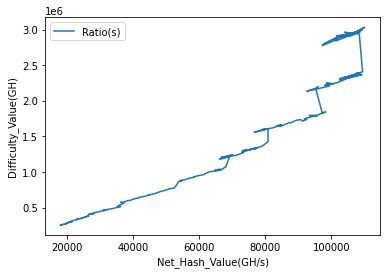

In [24]:
(plt.plot(x, y))
plt.xlabel("Net_Hash_Value(GH/s)")
plt.ylabel("Difficulty_Value(GH)")
plt.legend(["Ratio(s)"])
plt.show()

In [25]:
delayL = []
for i in range(620,809):
    delayL.append((data_b1["Difficulty_Value"][i]/data_b1["Net_Hash_Value"][i])-14)
    
print(delayL)

[0.16391132471755476, -0.01941513374143966, 0.06249761699509193, -0.0035724106367265307, -0.3074733187951981, 0.14304309833001305, -0.08697336997366101, -0.14719349496677125, -0.0735024228702219, 0.38082798778434146, -0.00356906721535033, -0.02167925686280192, 0.2151857345486281, -0.04652282687944442, 0.2857373753500312, -0.17821411543373422, 0.5088270943027027, 0.5112693655810006, 0.3188736338193614, 0.5773399789945035, 0.4990878257404461, 0.4869189938468832, 0.4192268379597408, 0.37602514387247155, 0.4602661526102185, 0.29515264454868095, 0.304637291373556, 0.22221273340879044, 0.45297907879116117, 0.27628565202323685, 0.3450252250160144, 0.31649778504128, 0.20586748763541252, 0.525887773906998, 1.0575272019710784, 0.8862944606247005, 0.7742954322779667, 1.2488544564502888, 0.9403316970073412, 0.9791946568641823, 0.8504532167072085, 0.7970510130126218, 0.756631033696328, 0.8402651828127876, 0.8173544395518988, 0.6988633982832138, 0.6341393833324283, 0.7189175738096729, 0.688877960882

In [26]:
# Import pandas package
import pandas as pd

# new dataframe for delay
df = pd.DataFrame(delayL)
print(df)

             0
0     0.163911
1    -0.019415
2     0.062498
3    -0.003572
4    -0.307473
..         ...
184  13.428570
185  13.612660
186  13.542239
187  13.754575
188  13.289955

[189 rows x 1 columns]


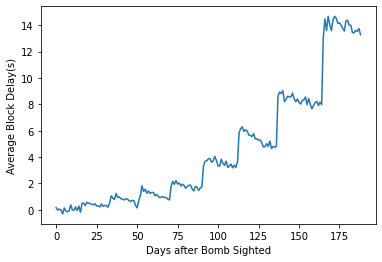

In [27]:
y = df
(plt.plot(y))
plt.xlabel("Days after Bomb Sighted")
plt.ylabel("Average Block Delay(s)")
plt.show()

In [28]:
df = df+13.3

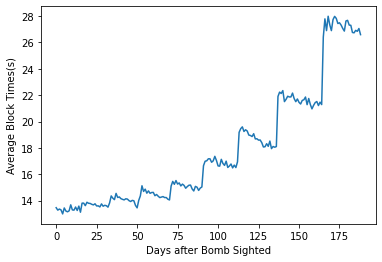

In [29]:
y = df
(plt.plot(y))
plt.xlabel("Days after Bomb Sighted")
plt.ylabel("Average Block Times(s)")
plt.show()

The given DataFrame tells us what the predicted delays are supposed to be on average with dynamic changes 

The Data is modelled as for 200 days after including the day the bomb started showing up.

Comments and Improvements would be appreciated